In [133]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 


In [134]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 
    survival - Survival (0 = No; 1 = Yes)
    class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    name - Name
    sex - Sex
    age - Age
    sibsp - Number of Siblings/Spouses Aboard
    parch - Number of Parents/Children Aboard
    ticket - Ticket Number
    fare - Passenger Fare
    cabin - Cabin
    embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [135]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handeling missing values in dataset 

In [137]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [138]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [139]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [140]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [141]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [142]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [143]:
# Droping the cabin feature column
df=df.drop('Cabin',axis=1)

In [144]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [145]:
# It only take the numerical columns 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analysis of Data describe :-
    1.survived we see min is 0 and max is 1.
    2.Pclass we see min is 1 and max is 3
    3.In Age we see 0.420 is min and max is 80. the min Age should not be zero or close to zero
    4.In Sibsp min is 0 and max is 8
    5.In parch it is also ok as min is 0 an max is 8
    6.I am not considering the fare for prediction, here is relation for target variable 

In [146]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Explotary Data Analysis 

B:\i new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

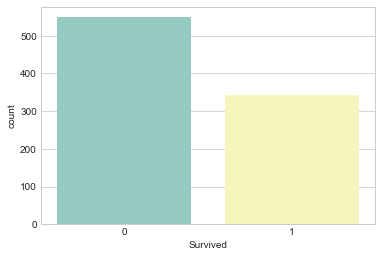

In [147]:
#Data analysis of feature columns 
sb.countplot(df['Survived'])

In [148]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    data = pd.DataFrame([survived,dead])
    data.index = ['Survived','Dead']
    data.plot(kind='bar',stacked=True, figsize=(10,5))

### Analysis of categorical columns 

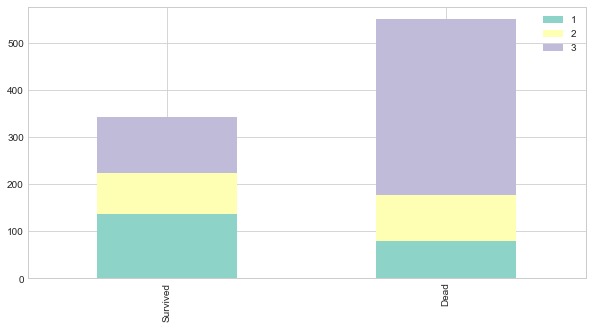

In [149]:
bar_chart('Pclass')

### Pclass 3 has higher ratio of death

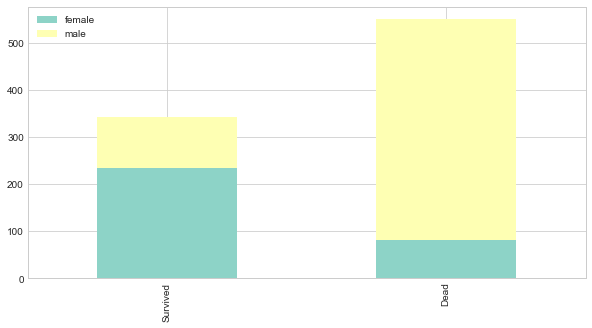

In [150]:
bar_chart('Sex')

In [151]:
## male is higher death ratio ,female has higher surviviel ratio 

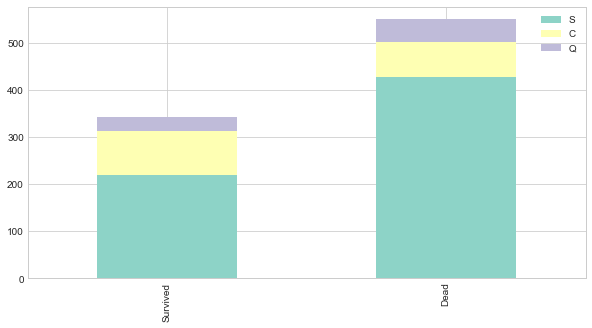

In [152]:
bar_chart('Embarked')

the above figure we sees S has high death and high survived ratio among all S,C,Q

# Analysis of continous columns

B:\i new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
B:\i new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
B:\i new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg

<AxesSubplot:xlabel='Parch', ylabel='Density'>

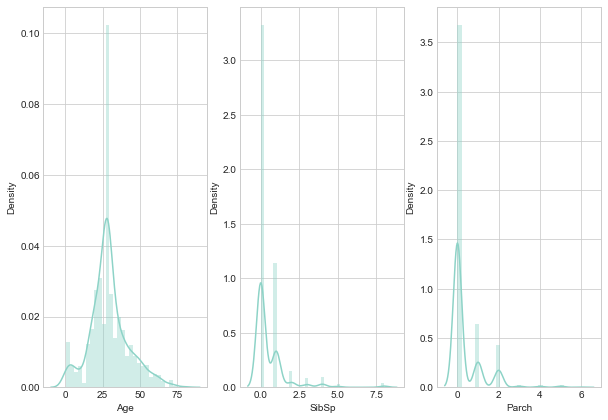

In [153]:
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
sb.distplot(df['Age'])
plt.subplot(1,3,2)
sb.distplot(df['SibSp'])
plt.subplot(1,3,3)
sb.distplot(df['Parch'])

Here, the columns of sibsp,parch has skewness and may be outliers 

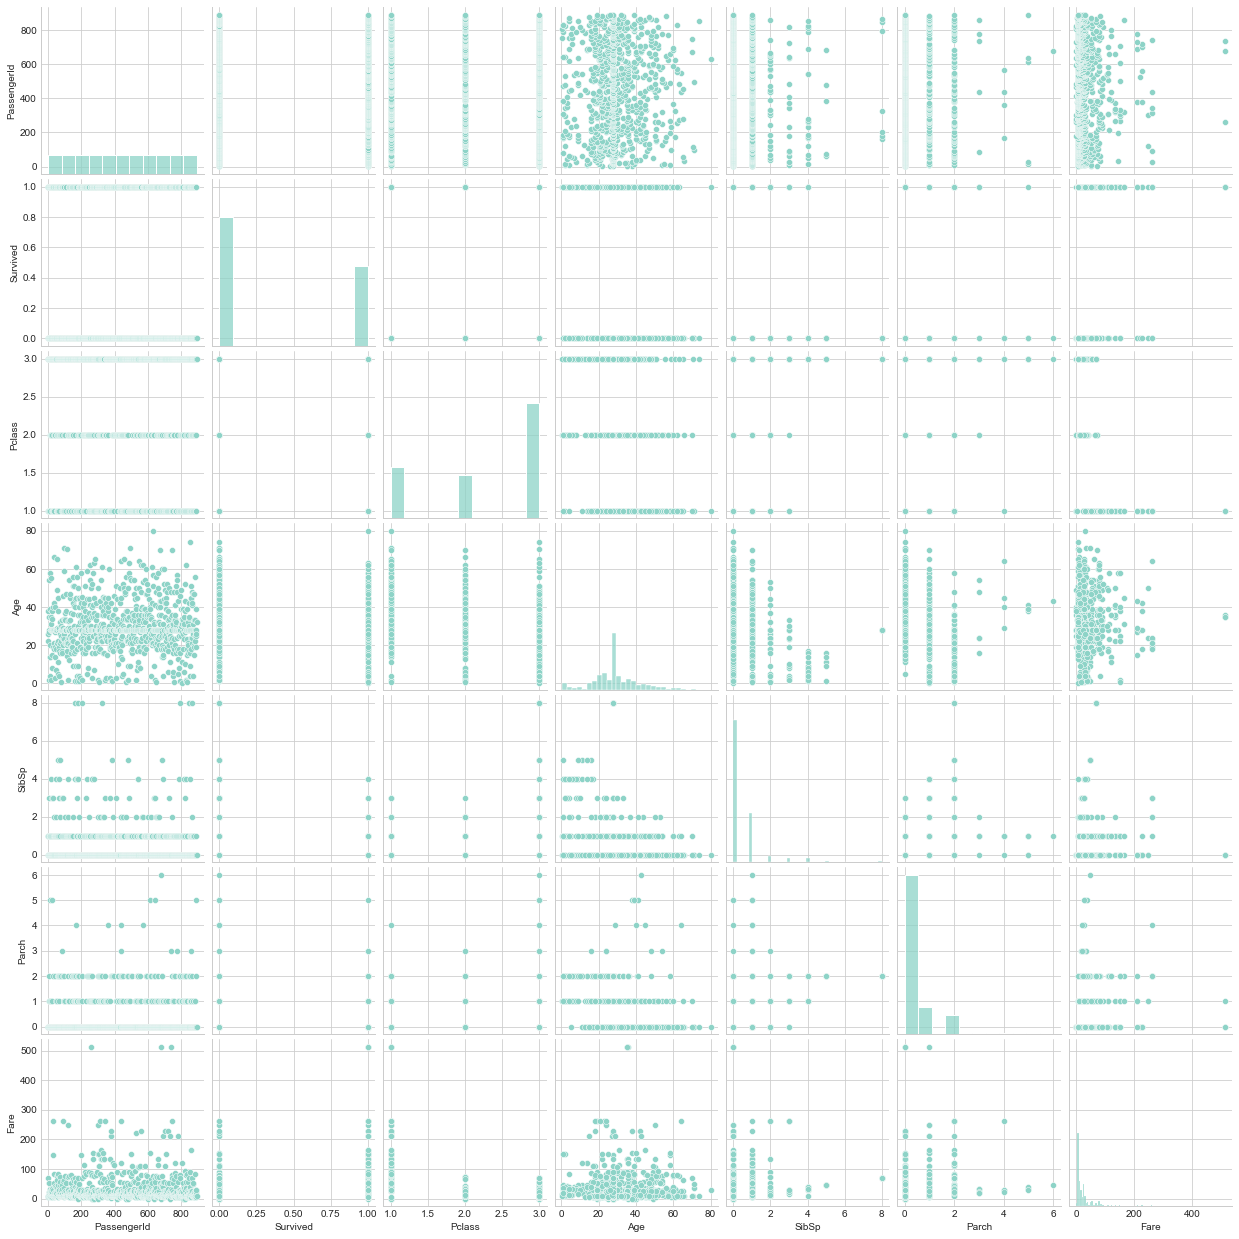

In [154]:
sb.pairplot(data=df)

# Checking outliers 

In [155]:
df.columns
ddf=df[['Age','SibSp','Parch']]
ddf

,Age,SibSp,Parch
0,22.0,1,0
1,38.0,1,0
2,26.0,0,0
3,35.0,1,0
4,35.0,0,0
...,...,...,...
886,27.0,0,0
887,19.0,0,0
888,28.0,1,2
889,26.0,0,0


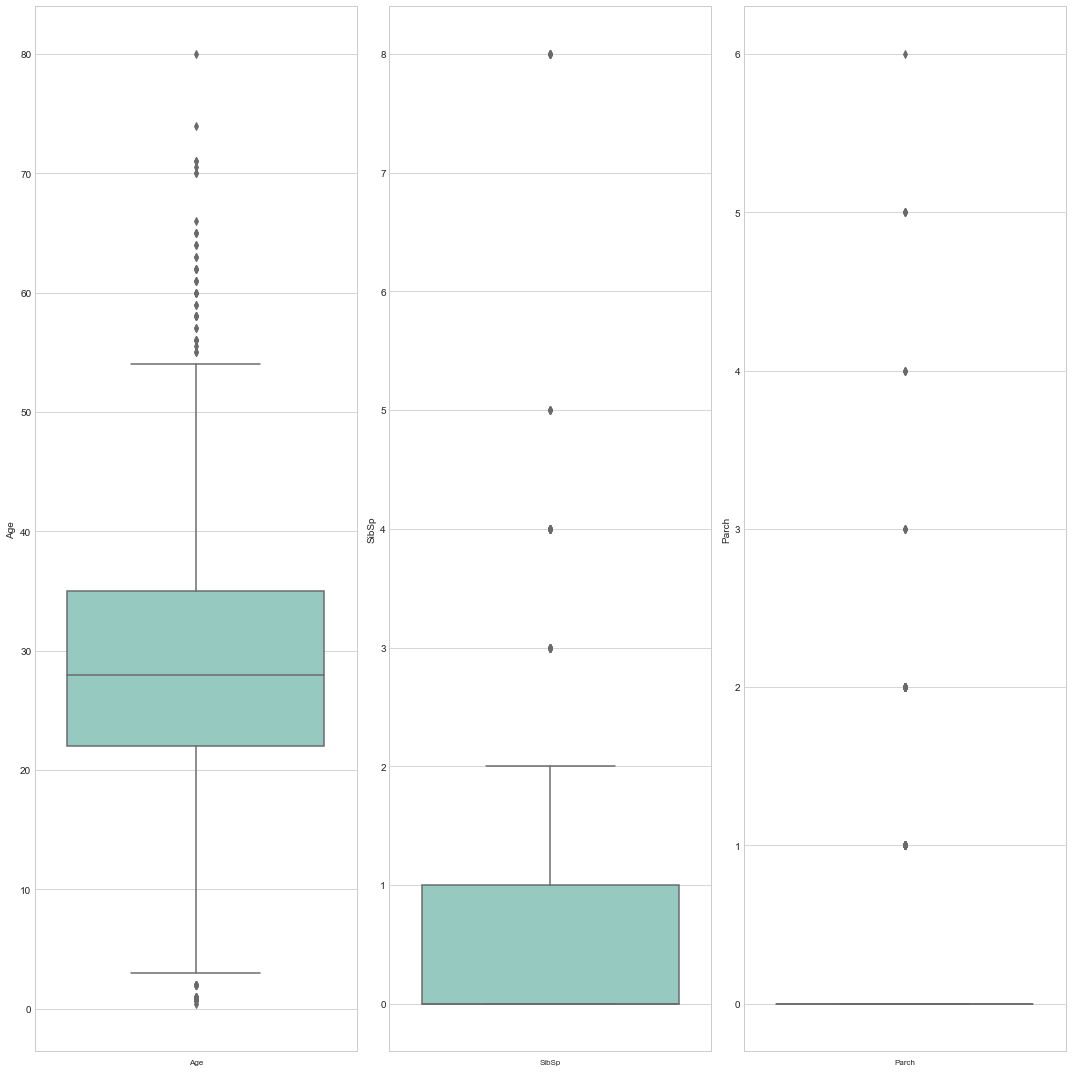

In [156]:




plt.figure(figsize=(15,15),frameon=True)
plt.style.use("seaborn-whitegrid")



num=1

for columns in ddf:
    
    if num<=4:
        ax=plt.subplot(1,3,num)
        sb.boxplot(y=ddf[columns])
        plt.xlabel(columns,fontsize=8)
        
    num+=1
plt.tight_layout()

 there are lots of outliers so we have to remove the outliers

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Feature Engineering

Sex and Embarked is categorical columns in object data-type should be in numeric, by using Labelencoder we convert string into numeric in order to perform the classification with the model 

In [158]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [159]:
df['Sex']=le.fit_transform(df['Sex'])

In [160]:
df['Sex'].unique()  # F=0 M=1

array([1, 0])

In [161]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [162]:
df['Embarked'].unique()      # C=0, Q=1, S=2

array([2, 0, 1])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 69.7+ KB


# Correlation 

In [164]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

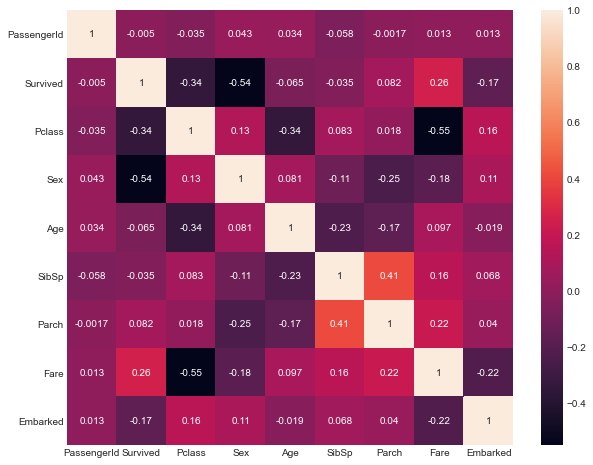

In [165]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True)

In [166]:
ddf

,Age,SibSp,Parch
0,22.0,1,0
1,38.0,1,0
2,26.0,0,0
3,35.0,1,0
4,35.0,0,0
...,...,...,...
886,27.0,0,0
887,19.0,0,0
888,28.0,1,2
889,26.0,0,0


# Removing outliers

In [167]:
ser1=pd.Series(df['Age'])
ser2=pd.Series(df['SibSp'])

In [168]:
q1_1=ser1.quantile(0.25)
q3_1=ser1.quantile(0.75)
iqr1=q3_1-q1_1


In [169]:
upside1=q3_1+(1.5*iqr1)
df=df[df['Age']<upside1]


In [170]:
df.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...,...
844,886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
845,887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
846,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
847,889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [171]:
q1_2=ser2.quantile(0.25)
q3_2=ser2.quantile(0.75)
iqr2=q3_2-q1_2

In [172]:
upside2=q3_2+(1.5*iqr2)
upside2

2.5

In [173]:
df=df[df['SibSp']<upside2]


In [174]:
df.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...,...
798,886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
799,887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
800,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
801,889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [175]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [178]:
x=df.drop(columns=['Parch','Name','PassengerId','Ticket','Fare','Survived'],axis=1)
y=df['Survived']

In [181]:
x.shape

(803, 5)

# Model Building

In [189]:
from sklearn.model_selection import train_test_split


In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Logistic Regression

In [196]:
maxr2=0
maxrs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy',acc,'randomstate',i,'\n')
    
    if acc>maxr2:
        maxr2=acc
        maxrs=i
        print('max_accuracy',maxr2,'maxrs',i)

accuracy 0.7860696517412935 randomstate 0 

max_accuracy 0.7860696517412935 maxrs 0
accuracy 0.7860696517412935 randomstate 1 

accuracy 0.7960199004975125 randomstate 2 

max_accuracy 0.7960199004975125 maxrs 2
accuracy 0.7860696517412935 randomstate 3 

accuracy 0.7910447761194029 randomstate 4 

accuracy 0.7661691542288557 randomstate 5 

accuracy 0.8009950248756219 randomstate 6 

max_accuracy 0.8009950248756219 maxrs 6
accuracy 0.8009950248756219 randomstate 7 

accuracy 0.7661691542288557 randomstate 8 

accuracy 0.7562189054726368 randomstate 9 

accuracy 0.7512437810945274 randomstate 10 

accuracy 0.7810945273631841 randomstate 11 

accuracy 0.8159203980099502 randomstate 12 

max_accuracy 0.8159203980099502 maxrs 12
accuracy 0.8059701492537313 randomstate 13 

accuracy 0.8009950248756219 randomstate 14 

accuracy 0.7960199004975125 randomstate 15 

accuracy 0.7661691542288557 randomstate 16 

accuracy 0.8208955223880597 randomstate 17 

max_accuracy 0.8208955223880597 maxrs 1

accuracy 0.7860696517412935 randomstate 180 

accuracy 0.7761194029850746 randomstate 181 

accuracy 0.835820895522388 randomstate 182 

accuracy 0.8009950248756219 randomstate 183 

accuracy 0.845771144278607 randomstate 184 

accuracy 0.746268656716418 randomstate 185 

accuracy 0.7910447761194029 randomstate 186 

accuracy 0.8109452736318408 randomstate 187 

accuracy 0.8109452736318408 randomstate 188 

accuracy 0.8109452736318408 randomstate 189 

accuracy 0.7860696517412935 randomstate 190 

accuracy 0.8059701492537313 randomstate 191 

accuracy 0.7960199004975125 randomstate 192 

accuracy 0.8009950248756219 randomstate 193 

accuracy 0.8308457711442786 randomstate 194 

accuracy 0.8009950248756219 randomstate 195 

accuracy 0.7661691542288557 randomstate 196 

accuracy 0.7960199004975125 randomstate 197 

accuracy 0.8109452736318408 randomstate 198 

accuracy 0.7761194029850746 randomstate 199 



In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=145,test_size=0.25)

# LogisticRegression

In [253]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [254]:
lr_predict=lr.predict(x_test)

In [256]:
lr_model=accuracy_score(y_test,lr_predict)
lr_model

0.8656716417910447

# DecisionTreeClassifier

In [199]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [200]:
dt_predict=dt.predict(x_test)

In [202]:
DecisionTree=accuracy_score(y_test,dt_predict)

# AdaBoostClassifier

In [205]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [207]:
ada_predict=ada.predict(x_test)

In [210]:
adaboost=accuracy_score(y_test,ada_predict)
adaboost

0.8756218905472637

# GradientBoostingClassifier

In [212]:
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [213]:
gd_predict=gd.predict(x_test)

In [215]:
gradientboost=accuracy_score(y_test,gd_predict)
gradientboost

0.8507462686567164

# RandomForestClassifier

In [217]:
rd=RandomForestClassifier()
rd.fit(x_train,y_train)

RandomForestClassifier()

In [219]:
rd_predict=rd.predict(x_test)

In [222]:
randomforest=accuracy_score(y_test,rd_predict)
randomforest

0.8557213930348259

# BaggingClassifier

In [225]:
bg=BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier()

In [227]:
bg_predict=bg.predict(x_test)

In [230]:
bagging=accuracy_score(y_test,bg_predict)
bagging

0.845771144278607

# ExtraTreeClassifier

In [232]:
et=ExtraTreeClassifier()
et.fit(x_train,y_train)

ExtraTreeClassifier()

In [233]:
et_predict=et.predict(x_test)

In [236]:
extratree=accuracy_score(y_test,et_predict)
extratree

0.8258706467661692

# SupportVectorclassifier

In [238]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [242]:
svc_predict=svc.predict(x_test)
svcmodel=accuracy_score(y_test,svc_predict)
svcmodel

0.6666666666666666

# KNeighborsClassifier

In [245]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [246]:
knn_predict=knn.predict(x_test)

In [247]:
knnmodel=accuracy_score(y_test,knn_predict)

In [249]:
knnmodel

0.8507462686567164

# GaussianNB

In [260]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [263]:
nb_predict=nb.predict(x_test)
nb_model=accuracy_score(y_test,nb_predict)

In [265]:
nb_model

0.845771144278607

# Evaluating model performance

In [269]:
model_accuracy=pd.DataFrame({'models':['Logistic Regression','Decision tree','Ada boost','Gradient boost','Random forest','Bagging ensemble',
                      'support vector machine','Naive bayes','Extra tree','K- NEREAST NEIGHBORS'],
               'accuracy':[lr_model,DecisionTree,adaboost,gradientboost,randomforest,bagging,svcmodel,nb_model,extratree,knnmodel]})

In [270]:
model_accuracy.sort_values(by='accuracy',ascending=False)

,models,accuracy
2,Ada boost,0.875622
0,Logistic Regression,0.865672
4,Random forest,0.855721
3,Gradient boost,0.850746
9,K- NEREAST NEIGHBORS,0.850746
1,Decision tree,0.845771
5,Bagging ensemble,0.845771
7,Naive bayes,0.845771
8,Extra tree,0.825871
6,support vector machine,0.666667


### It appears that the Ada Boost model works the best with our data so we will use it on the test set.

# Hyperparameter tuning

In [279]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [280]:
ada_pred=ada.predict(x_test)

In [282]:
accuracy_score(y_test,ada_pred)

0.8557213930348259

In [284]:
ada=AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=100)

In [286]:
ada_pred1=ada.predict(x_test)

In [290]:
accuracy_score(y_test,ada_pred1)

0.8606965174129353

#### Hyperparameter is not showing the better results,so we stick with previous model with default parameter

In [294]:
ada_model=AdaBoostClassifier()
import pickle

In [296]:
pickle.dump(ada_model,open('titanic_prediction','wb'))